In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer, BasicAer
from qiskit.tools.monitor import job_monitor
import numpy as np
from scipy.optimize import minimize
from pylab import *
from Ising_n_exact import *
from math import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.quantumregister import AncillaQubit, AncillaRegister

In [2]:
bit = ['0','1']
dic = []
n = 6
def decToBin(k, n): 
    q1 = bin(k).replace("0b", "")
    q2 = '0'*(n-len(q1)) + q1
    q2 =q2[::-1]
    return q2
for k in range(0,2**n):
    dic.append(decToBin(k, n)[::-1])
#dic

In [89]:
h = float(input())
g = float(input())

4
0.1


In [90]:
ha = np.array([g*h, g*h, g*h, g, g, g, 1, 0])
nor = np.sqrt(sum(ha[:]**2))
psiS = ha/nor
psiS

array([0.32551538, 0.32551538, 0.32551538, 0.08137885, 0.08137885,
       0.08137885, 0.81378846, 0.        ])

In [81]:
# zz = QuantumCircuit(2)   
# zz.z([0,1])
# zz.to_gate()
# c_zz = zz.control()
# #c_zz?

In [91]:
n = 6
num_shot = 100000
q = QuantumRegister(n)
c = ClassicalRegister(n)
ancreg = AncillaRegister(1)

anc = AncillaQubit(ancreg, 0)
qc = QuantumCircuit(q, c, ancreg)

qc.initialize(psiS, [q[0],q[1],q[2]])
qc.ry(np.pi/6, q[4])
qc.ry(np.pi/6, q[3])
qc.ry(np.pi/6, q[5])
qc.cx(3, 4)
qc.cx(4, 5)
qc.cx(5, 3)
qc.ry(np.pi/3, q[4])
qc.ry(np.pi/3, q[3])
qc.ry(np.pi/3, q[5])
# qc.h([3, 4, 5])
# qc.initialize(vec, [q[2], q[3]])
qc.x([0, 1, 2])

qc.mct([0, 1, 2], 3)

qc.barrier()
qc.x(0)
qc.mct([0, 1, 2], 4)

qc.barrier()
qc.x([0, 1])
qc.mct([0, 1, 2], 5)


qc.barrier()
qc.x(0)

qc.mct([0, 1, 2], anc)
qc.cz(anc, [3, 5])
qc.mct([0, 1, 2], anc)
qc.barrier()

qc.x([0, 1, 2])
qc.mct([0, 1, 2], anc)
qc.cz(anc, [3, 4])
qc.mct([0, 1, 2], anc)
qc.barrier()

qc.x(0)
qc.mct([0, 1, 2], anc)
qc.cz(anc, [4, 5])
qc.mct([0, 1, 2], anc)
qc.barrier()
#
qc.x([0, 1])
qc.barrier()

qc.x(0)
qc.h([0, 1, 2])
#     qc.initialize([1,0,0,0], [q[0],q[1]])
qc.barrier()

qc.measure(range(n), range(n))
# qc.draw('mpl')

In [92]:
shots = num_shot
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=shots).result()
counts = result.get_counts()
for i in dic:
    if i not in counts:
        counts[i] = 0
#plot_histogram(counts)

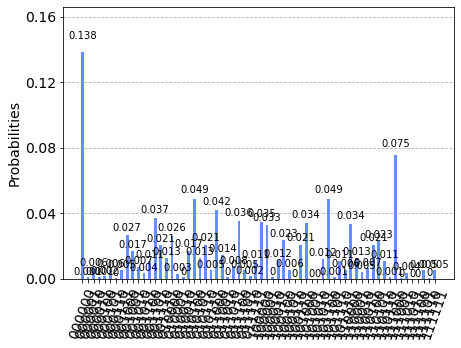

In [8]:
plot_histogram(counts)

In [93]:
arr = np.array([counts['000000'], counts['001000'], counts['010000'],counts['011000'],counts['100000'],
                counts['101000'],counts['110000'],counts['111000']])

# norm = np.linalg.1or0(arr),counts['1011000'],counts['1100000'],counts['1101000']
normal = sum(arr[:])
array = arr/normal
new = np.array(list(np.sqrt(array[:])))
new

array([0.54903884, 0.31854577, 0.32201303, 0.257912  , 0.28743828,
       0.295581  , 0.29605025, 0.41138706])

In [95]:
k = 10
for j in range(1, k):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    ancreg = AncillaRegister(1)

    anc = AncillaQubit(ancreg, 0)
    qc = QuantumCircuit(q, c, ancreg)

    qc.initialize(psiS, [q[0],q[1],q[2]])
    
    qc.initialize(new, [q[3], q[4], q[5]])
    qc.x([0, 1, 2])

    qc.mct([0, 1, 2], 3)

    qc.barrier()
    qc.x(0)
    qc.mct([0, 1, 2], 4)

    qc.barrier()
    qc.x([0, 1])
    qc.mct([0, 1, 2], 5)


    qc.barrier()
    qc.x(0)

    qc.mct([0, 1, 2], anc)
    qc.append(c_zz, [anc] + [i for i in [3, 5]])
    qc.mct([0, 1, 2], anc)
    qc.barrier()

    qc.x([0, 1, 2])
    qc.mct([0, 1, 2], anc)
    qc.append(c_zz, [anc] + [i for i in [3, 4]])
    qc.mct([0, 1, 2], anc)
    qc.barrier()

    qc.x(0)
    qc.mct([0, 1, 2], anc)
    qc.append(c_zz, [anc] + [i for i in [4, 5]])
    qc.mct([0, 1, 2], anc)
    qc.barrier()
    #
    qc.x([0, 1])
    qc.barrier()

    qc.x(0)
    qc.h([0, 1, 2])
    #     qc.initialize([1,0,0,0], [q[0],q[1]])
    qc.barrier()
    qc.measure(range(n), range(n))
    # shot
    shots = num_shot
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=shots).result()
    counts = result.get_counts()
    for i in dic:
            if i not in counts:
                counts[i] = 0

    # update x(t+1)
    arr = np.array([counts['000000'], counts['001000'], counts['010000'],counts['011000'],counts['100000'],
                counts['101000'],counts['110000'],counts['111000']])

    normal = sum(arr[:])
    array = arr/normal
    new = np.array(list(np.sqrt(array[:])))
    print('epoch ', j, ':', new)

epoch  1 : [0.42928557 0.33119924 0.32706025 0.32799702 0.32404442 0.32434727
 0.32724782 0.41734091]
epoch  2 : [0.4295922  0.32808173 0.32886001 0.32446259 0.32314676 0.32524953
 0.32509978 0.42247732]
epoch  3 : [0.42778264 0.32349092 0.3293508  0.32360317 0.32375278 0.32349092
 0.32438785 0.42950547]
epoch  4 : [0.42922973 0.32496142 0.32776754 0.32578705 0.32337935 0.32413368
 0.3269469  0.42433717]
epoch  5 : [0.42671435 0.32699568 0.32688434 0.32599223 0.32829189 0.32814401
 0.32315096 0.42188125]
epoch  6 : [0.42467483 0.32637693 0.32400817 0.32705056 0.33327219 0.32558926
 0.32532627 0.42222046]
epoch  7 : [0.42246969 0.32476188 0.32880099 0.32615128 0.32935806 0.32939516
 0.32656321 0.42183279]
epoch  8 : [0.4200377  0.32328201 0.32839589 0.32742441 0.33036736 0.33118226
 0.32738699 0.4219004 ]
epoch  9 : [0.41947019 0.32830136 0.32848819 0.32623927 0.32751555 0.32807704
 0.32605116 0.42510715]


In [53]:
Emin_exact,vec_Emin_exact=groundsate(n=3, h=h)
Psi=vec_Emin_exact
theta = Theta(Psi)
theta.append(0)
theta

[1.5707963267948963,
 1.4218125251695366,
 1.7197801284202565,
 1.3093303465082593,
 1.5707963267948966,
 1.5707963267948963,
 1.8322623070815325,
 0]

In [54]:
Emin_exact

-12.211102550927993

In [55]:
vec = list(vec_Emin_exact)
vec

[0.42504408650379616,
 0.3262603891209971,
 0.32626038912099725,
 0.32626038912099725,
 0.32626038912099725,
 0.3262603891209972,
 0.32626038912099725,
 0.4250440865037957]

In [14]:
shots = 100000

In [71]:
para = [0.42535452, 0.3228341,  0.32346186, 0.32960131, 0.33068565, 0.32702073,
 0.32449317, 0.42425900511607245]

In [70]:
np.sqrt(1-sum(np.array(para[i])**2 for i in range(7)))

<ipython-input-70-04a605758e63>:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sqrt(1-sum(np.array(para[i])**2 for i in range(7)))


0.42425900511607245

In [98]:
para = new

In [99]:
q1 = QuantumRegister(3)
c1 = ClassicalRegister(3)
qc1 = QuantumCircuit(q1,c1)
qc1.initialize(para, [q1[0],q1[1],q1[2]])
qc1.measure(range(3), range(3))
backend = Aer.get_backend('qasm_simulator')
result = execute(qc1, backend, shots=shots).result()
counts = result.get_counts()
qc1.measure(range(3), range(3))
# get full possible keys for counts otherwise we might encounter KeyError where we count nothing for a key
# Remember dic is the list that contain all 2^4=16 possible keys, appending key for count where key in dic but not in count     
for i in dic:
    if i not in counts:
        counts[i] = 0
# function to calculate probability
def prob(j):
    e = 0
    for i in counts.keys():
        if i[j] == i[(j+1)%3]:
            e += counts[i]
        else:
            e -= counts[i]
    return e/shots

# expectation value of energy estimation from counts
E_J = -(prob(0) + prob(1) + prob(2))
E_J
q2 = QuantumRegister(3)
c2 = ClassicalRegister(3)
qc2 = QuantumCircuit(q2, c2)
qc2.initialize(para, [q2[0], q2[1], q2[2]])
qc2.h([0, 1, 2])
qc2.measure(range(3),range(3))
# Executing the circuit by qasm_simulation to caculate energy from result.get(counts)    

backend = Aer.get_backend('qasm_simulator')
result = execute(qc2, backend, shots=shots).result()
counts = result.get_counts()

# get full possible keys for counts otherwise we might encounter KeyError where we count nothing for a key
# Remember dic is the list that contain all 2^4=16 possible keys, appending key for count where key in dic but not in count 

for i in dic:
    if i not in counts:
        counts[i] = 0
# function to calculate probability

def prob(j):
    e2 = 0
    for i in counts.keys():
        if i[j] == '0':
            e2 += counts[i]
        else:
            e2 -= counts[i]
    return e2/shots 
# expectation value estimation from counts

E_Z = -(prob(0)+prob(1)+prob(2))
print('E_total mean is',(E_J + h*E_Z))

E_total mean is -12.21472


In [59]:
Emin_exact,vecmin = groundsate(n=3, h=h)
Psi=vec_Emin_exact
theta = Theta(Psi)
theta.append(0)
Emin_exact

-12.211102550927993

In [201]:
-9.291502622129173--7.4614199999999995


-1.830082622129173

In [3]:
-6.46410161513776--5.1606


-1.30350161513776